# logistic regression

## data

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as opt

In [2]:
data = pd.read_csv('../data/Linearity/ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
positive = data[data['admitted'].isin([1])]
negetive = data[data['admitted'].isin([0])]

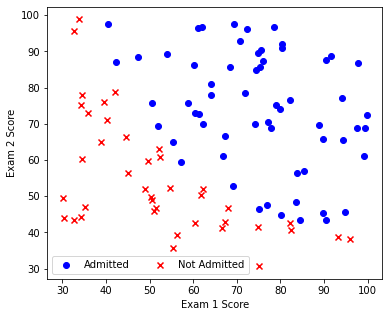

In [5]:
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negetive['exam1'], negetive['exam2'], c='r', marker='x', label='Not Admitted')
ax.legend(ncol=3)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## data proccess

In [6]:
X_pre = data.iloc[:, :-1]
y_pre = data.iloc[:, -1]
X_pre.insert(0, 'Ones', 1)# 用于准确度检验和scipy掉包时用

In [7]:
# data = (data - data.mean()) / data.std()    # 归一化
data.insert(0, 'Ones', 1)

In [8]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = np.array(X)
y = np.array(y)
theta = np.array(np.zeros(X.shape[1]))
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

## gradient descent

sigmoid函数：<br>
$$
g(z)=\frac{1}{1+e^{-z}}
$$

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(- z))

代价函数公式：<br>
$$
J(\theta)=\frac{1}{m} \sum_{i=1}^{m}\left[-y^{(i)} \log \left(h_{\theta}\left(x^{(i)}\right)\right)-\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)\right]
$$

In [10]:
def computeCost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta) + 1e-5)
    second = (1 - y) * np.log(1 - sigmoid(X @ theta) + 1e-5)
    return np.mean(first - second)    # Cross-entropy Loss

In [11]:
computeCost(theta, X, y)

0.6931271807599428

In [12]:
theta = theta - (X.T @ (sigmoid(X @ theta) - y))/len(X)
theta, computeCost(theta, X, y)

(array([ 0.1       , 12.00921659, 11.26284221]), 4.60516418601809)

梯度公式：<br>
$$
\frac{\partial J(\omega)}{\partial \omega_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\omega}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$

In [13]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y))/len(X)

In [14]:
gradient(theta, X, y)

array([ 0.4       , 20.81292044, 21.84815684])

In [15]:
def batch_gradientDescent(X, y, theta, alpha, batch) ->list:

    temp = np.array(np.zeros(theta.shape))
    cost = np.zeros(batch)
    
    for i in range(batch):
        temp = theta - alpha * gradient(theta, X, y)
        theta = temp
        cost[i] = computeCost(theta, X, y)
        
    return theta, cost

In [16]:
alpha = 0.0001
batch = 300000
res, cost = batch_gradientDescent(X, y, theta, alpha, batch)

Text(0.5, 1.0, 'Error vs. Training Epoch  lr=0.0001')

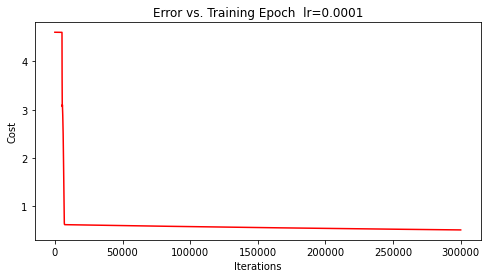

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(batch), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch  lr=0.0001')
# plt.show()

In [18]:
def predict(theta, X) -> list:
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [19]:
res = predict(theta, X)
res = np.array(res)

In [20]:
from sklearn.metrics import accuracy_score
print("训练集准确率：", accuracy_score(y_pre, res))

训练集准确率： 0.6


## Summarize

我在实现算法的时候进行了调试优化，分别是有无归一化和步长、epoch增加与减小。

是否归一化的比较

<center class="half">
<img src="../img/logistic1.png" title="归一化" width="400"/><img src="../img/logistic2.png" title="未归一化" width="400"/>
</center>

关于归一化之后的

## using Scipy

In [21]:
theta = np.array(np.zeros(X.shape[1]))

In [22]:
theta0 = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X_pre, y_pre))[0]
res0 = predict(theta0, X_pre)

In [23]:
from sklearn.metrics import accuracy_score
print("训练集准确率：", accuracy_score(y_pre, res0))

训练集准确率： 0.89
